In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X1  = pd.read_csv('dump1.position',header=None)
X2  = pd.read_csv('dump2.position',header=None)
X3  = pd.read_csv('dump3.position',header=None)
X4  = pd.read_csv('dump4.position',header=None)
X5  = pd.read_csv('dump5.position',header=None)

In [3]:
X1.head(30)

,0
0,ITEM: TIMESTEP
1,0
2,ITEM: NUMBER OF ATOMS
3,15
4,ITEM: BOX BOUNDS ff fm pp
5,-4.1000000000000000e+01 4.1000000000000000e+01
6,0.0000000000000000e+00 2.0000000000000000e+02
7,-2.5000000000000000e-01 2.5000000000000000e-01
8,ITEM: ATOMS id type x y
9,42463 2 -20 140


In [4]:
atom_id,_,x,y = map(float,X1.iloc[9][0].strip().split())

In [5]:
atom_id,x,y

(42463.0, -20.0, 140.0)

In [6]:
X1.shape[0]

1896

In [7]:
# Creating df
df1 = {}
df2 = {}
df3 = {}
df4 = {}
df5 = {}
for i in range(42463,42538,1):
    if 42463<=i<42463+15:
        df1[i] = {}
    elif 42463+15<=i<42463+30:
        df2[i] = {}
    elif 42463+30<=i<42463+45:
        df3[i] = {}
    elif 42463+45<=i<42463+60:
        df4[i] = {}
    elif 42463+60<=i<42463+75:
        df5[i] = {}
    
for i in range(0,X1.shape[0],24):
    time = int(X1.iloc[i+1][0])*(0.00005)
    for j in range(i+9,i+24):
        sphere_id,_,x,y = map(float, X1.iloc[j][0].strip().split())
        df1[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X2.iloc[j][0].strip().split())
        df2[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X3.iloc[j][0].strip().split())
        df3[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X4.iloc[j][0].strip().split())
        df4[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X5.iloc[j][0].strip().split())
        df5[int(sphere_id)][time] = [x,y]
        
data1 = pd.DataFrame(df1)
data1.index.name = 'Time'

data2 = pd.DataFrame(df2)
data2.index.name = 'Time'

data3 = pd.DataFrame(df3)
data3.index.name = 'Time'

data4 = pd.DataFrame(df4)
data4.index.name = 'Time'

data5 = pd.DataFrame(df5)
data5.index.name = 'Time'

In [8]:
data1

,42463,42464,42465,42466,42467,42468,42469,42470,42471,42472,42473,42474,42475,42476,42477
Time,,,,,,,,,,,,,,,
0.0,"[-20.0, 140.0]","[-20.5, 140.866]","[-19.5, 140.866]","[-21.0, 141.732]","[-20.0, 141.732]","[-19.0, 141.732]","[-21.5, 142.598]","[-20.5, 142.598]","[-19.5, 142.598]","[-18.5, 142.598]","[-22.0, 143.464]","[-21.0, 143.464]","[-20.0, 143.464]","[-19.0, 143.464]","[-18.0, 143.464]"
0.5,"[-20.0, 139.875]","[-20.5, 140.741]","[-19.5, 140.741]","[-21.0, 141.607]","[-20.0, 141.607]","[-19.0, 141.607]","[-21.5, 142.473]","[-20.5, 142.473]","[-19.5, 142.473]","[-18.5, 142.473]","[-22.0, 143.339]","[-21.0, 143.339]","[-20.0, 143.339]","[-19.0, 143.339]","[-18.0, 143.339]"
1.0,"[-20.0, 139.5]","[-20.5, 140.366]","[-19.5, 140.366]","[-21.0, 141.232]","[-20.0, 141.232]","[-19.0, 141.232]","[-21.5, 142.098]","[-20.5, 142.098]","[-19.5, 142.098]","[-18.5, 142.098]","[-22.0, 142.964]","[-21.0, 142.964]","[-20.0, 142.964]","[-19.0, 142.964]","[-18.0, 142.964]"
1.5,"[-20.0, 138.875]","[-20.5, 139.741]","[-19.5, 139.741]","[-21.0, 140.607]","[-20.0, 140.607]","[-19.0, 140.607]","[-21.5, 141.473]","[-20.5, 141.473]","[-19.5, 141.473]","[-18.5, 141.473]","[-22.0, 142.339]","[-21.0, 142.339]","[-20.0, 142.339]","[-19.0, 142.339]","[-18.0, 142.339]"
2.0,"[-20.0, 138.0]","[-20.5, 138.866]","[-19.5, 138.866]","[-21.0, 139.732]","[-20.0, 139.732]","[-19.0, 139.732]","[-21.5, 140.598]","[-20.5, 140.598]","[-19.5, 140.598]","[-18.5, 140.598]","[-22.0, 141.464]","[-21.0, 141.464]","[-20.0, 141.464]","[-19.0, 141.464]","[-18.0, 141.464]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37.0,"[-27.8081, 3.2926]","[-28.6838, 2.80982]","[-28.664, 3.80962]","[-29.5595, 2.32704]","[-29.5397, 3.32684]","[-29.52, 4.32665]","[-30.4352, 1.84426]","[-30.4155, 2.84407]","[-30.3957, 3.84387]","[-30.3759, 4.84368]","[-31.3109, 1.36148]","[-31.2912, 2.36129]","[-31.2714, 3.36109]","[-31.2516, 4.3609]","[-31.2318, 5.3607]"
37.5,"[-27.8128, 3.29697]","[-28.6877, 2.81278]","[-28.6696, 3.81261]","[-29.5627, 2.32859]","[-29.5445, 3.32842]","[-29.5263, 4.32826]","[-30.4376, 1.8444]","[-30.4194, 2.84424]","[-30.4013, 3.84407]","[-30.3831, 4.84391]","[-31.3125, 1.36021]","[-31.2944, 2.36005]","[-31.2762, 3.35988]","[-31.2581, 4.35972]","[-31.2399, 5.35955]"
38.0,"[-27.8113, 3.28805]","[-28.6871, 2.80534]","[-28.6672, 3.80514]","[-29.5628, 2.32263]","[-29.543, 3.32243]","[-29.5231, 4.32224]","[-30.4386, 1.83992]","[-30.4187, 2.83973]","[-30.3989, 3.83953]","[-30.379, 4.83933]","[-31.3143, 1.35721]","[-31.2945, 2.35702]","[-31.2746, 3.35682]","[-31.2548, 4.35662]","[-31.2349, 5.35643]"


In [9]:
time_Arr = []
x_Arr1 = []
y_Arr1 = []

x_Arr2 = []
y_Arr2 = []

x_Arr3 = []
y_Arr3 = []

x_Arr4 = []
y_Arr4 = []

x_Arr5 = []
y_Arr5 = []
for i in data1.index:
    instance1  = data1.loc[i]
    instance2  = data2.loc[i]
    instance3  = data3.loc[i]
    instance4  = data4.loc[i]
    instance5  = data5.loc[i]
    time_Arr.append(i)
    
    center_x = (instance1[42463][0]+instance1[42473][0]+instance1[42477][0])/3
    x_Arr1.append(center_x)
    center_y = (instance1[42463][1]+instance1[42473][1]+instance1[42477][1])/3
    y_Arr1.append(center_y)
    
    center_x = (instance2[42463+15][0]+instance2[42473+15][0]+instance2[42477+15][0])/3
    x_Arr2.append(center_x)
    center_y = (instance2[42463+15][1]+instance2[42473+15][1]+instance2[42477+15][1])/3
    y_Arr2.append(center_y)
    
    center_x = (instance3[42463+30][0]+instance3[42473+30][0]+instance3[42477+30][0])/3
    x_Arr3.append(center_x)
    center_y = (instance3[42463+30][1]+instance3[42473+30][1]+instance3[42477+30][1])/3
    y_Arr3.append(center_y)
    
    center_x = (instance4[42463+45][0]+instance4[42473+45][0]+instance4[42477+45][0])/3
    x_Arr4.append(center_x)
    center_y = (instance4[42463+45][1]+instance4[42473+45][1]+instance4[42477+45][1])/3
    y_Arr4.append(center_y)
    
    center_x = (instance5[42463+60][0]+instance5[42473+60][0]+instance5[42477+60][0])/3
    x_Arr5.append(center_x)
    center_y = (instance5[42463+60][1]+instance5[42473+60][1]+instance5[42477+60][1])/3
    y_Arr5.append(center_y)


centroid_df1 =pd.DataFrame({"time":time_Arr,"x":x_Arr1,"y":y_Arr1})
centroid_df2 =pd.DataFrame({"time":time_Arr,"x":x_Arr2,"y":y_Arr2})
centroid_df3 =pd.DataFrame({"time":time_Arr,"x":x_Arr3,"y":y_Arr3})
centroid_df4 =pd.DataFrame({"time":time_Arr,"x":x_Arr4,"y":y_Arr4})
centroid_df5 =pd.DataFrame({"time":time_Arr,"x":x_Arr5,"y":y_Arr5})

In [10]:
centroid_df5

,time,x,y
0,0.0,20.000000,142.309333
1,0.5,20.000000,142.184333
2,1.0,20.000000,141.809333
3,1.5,20.000000,141.184333
4,2.0,20.000000,140.309333
...,...,...,...
74,37.0,33.813500,4.907527
75,37.5,33.807000,4.907327
76,38.0,33.809167,4.891947
77,38.5,33.804167,4.911433


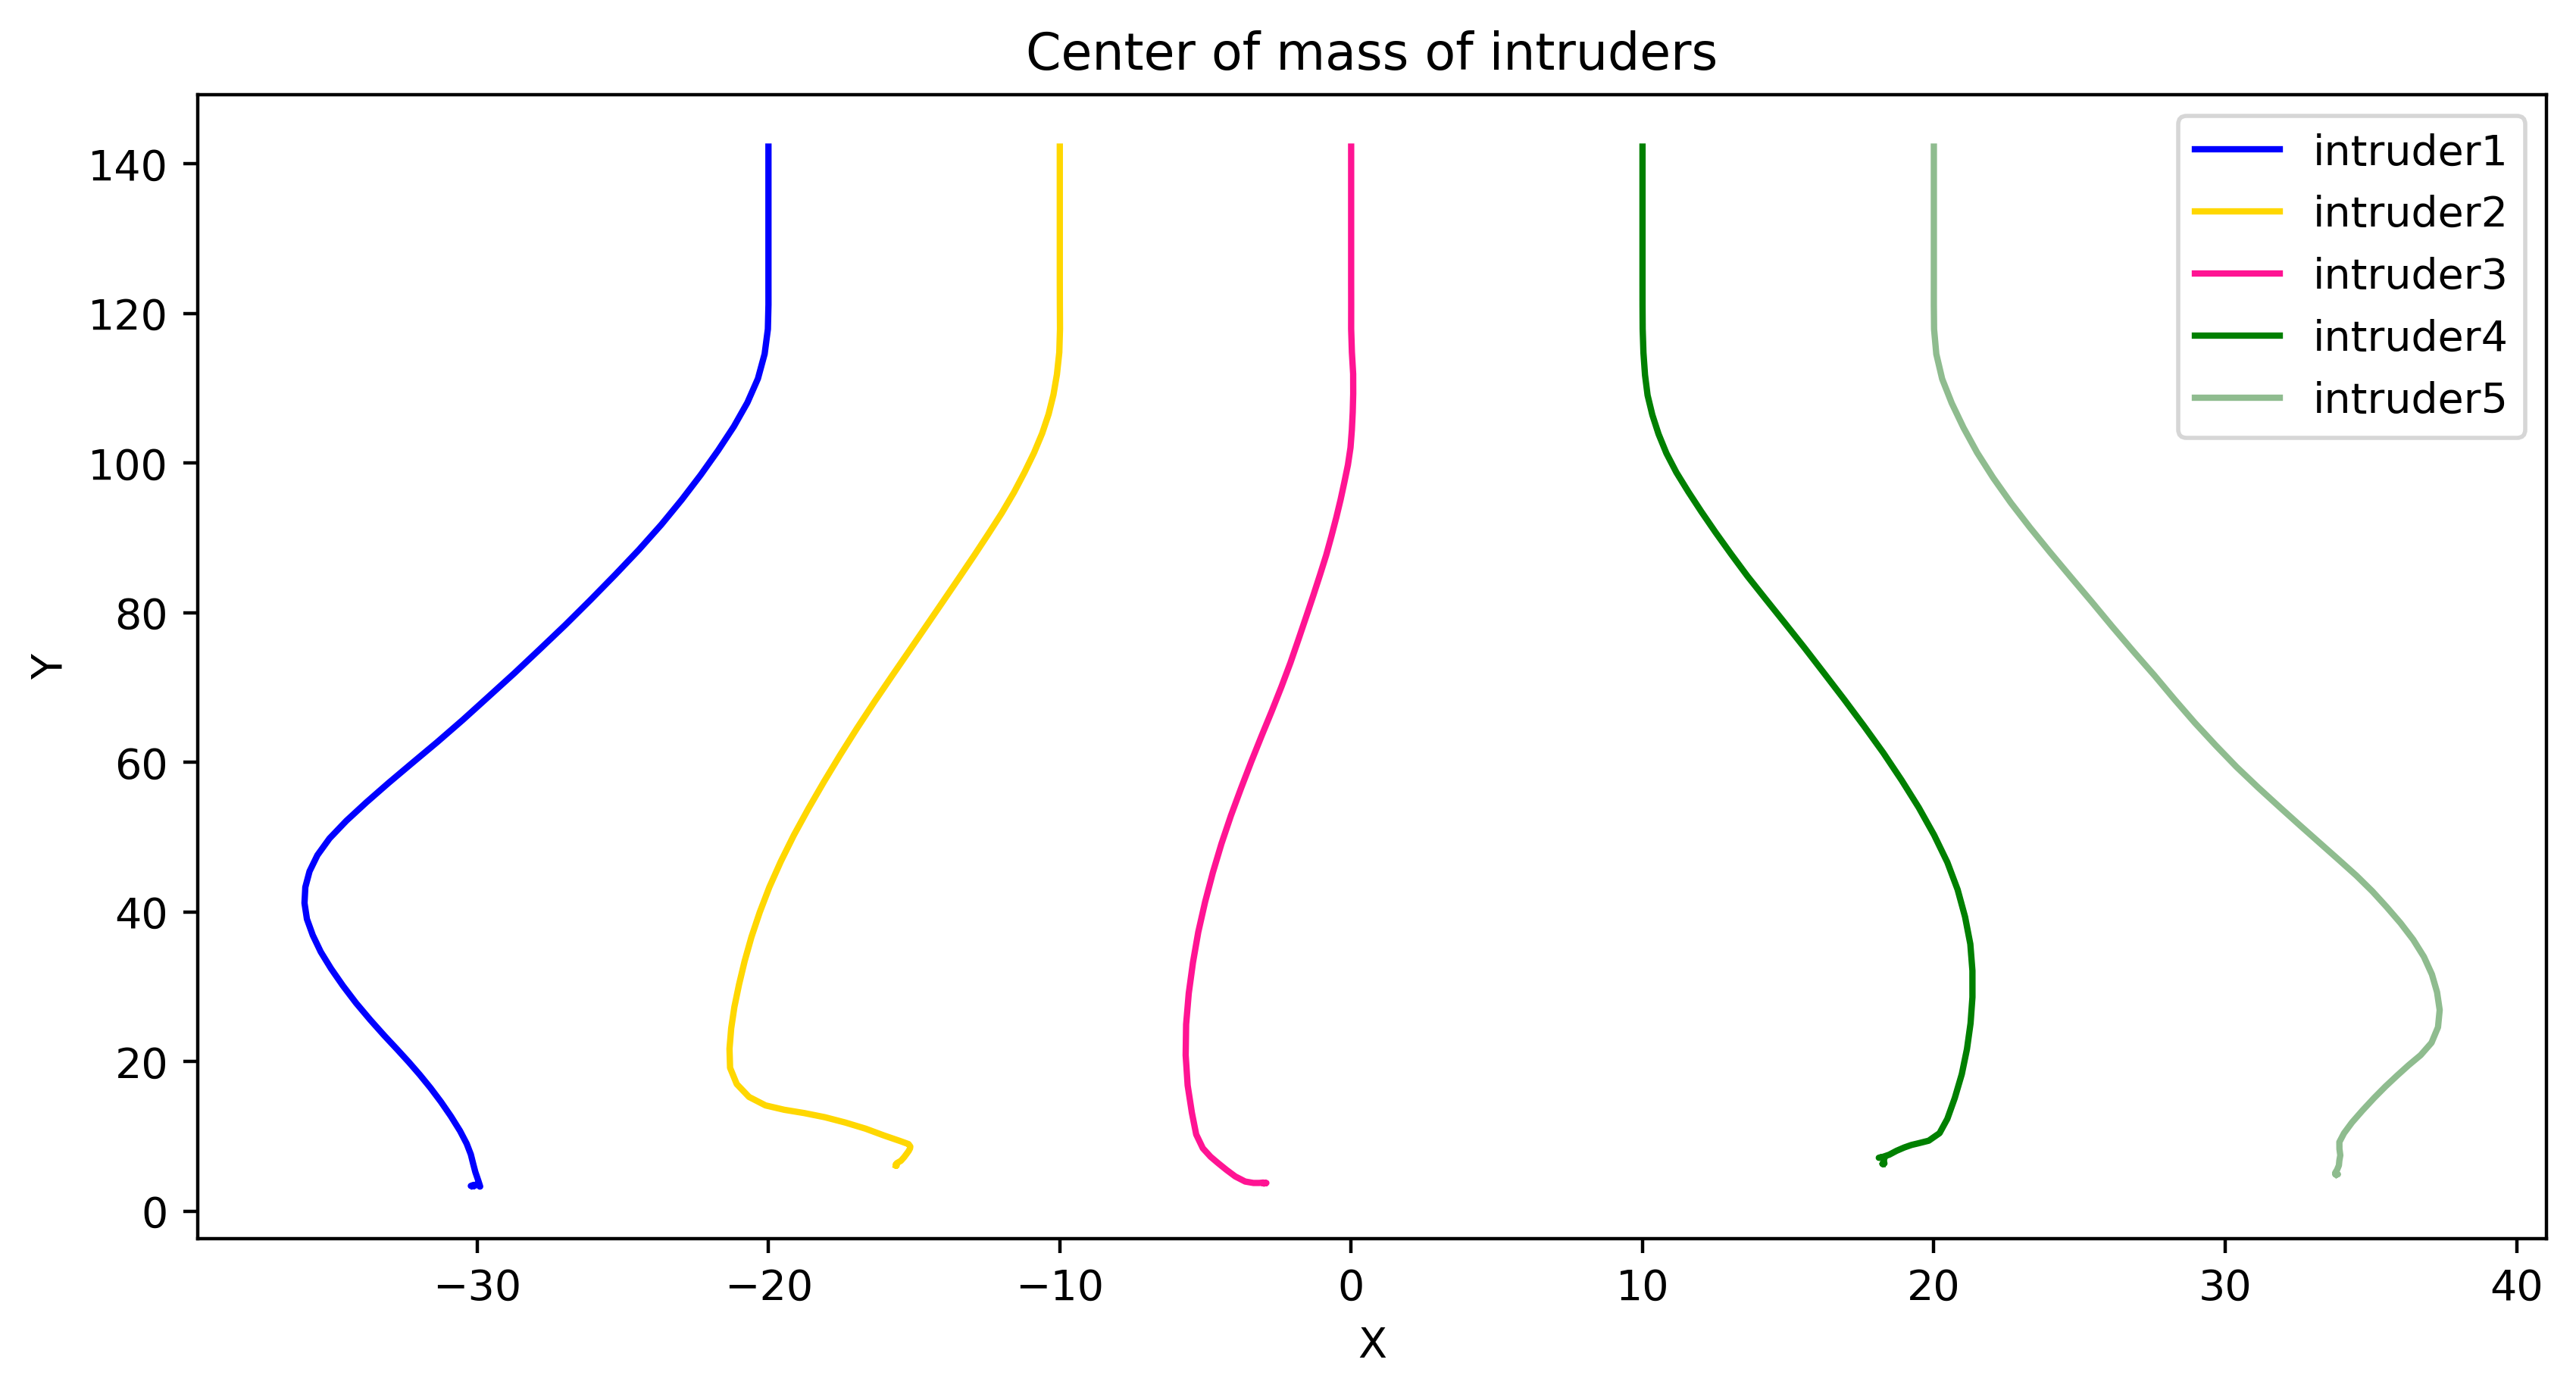

In [11]:
# y Vs x
plt.figure(figsize=(10,5),dpi=400)
plt.plot(x_Arr1,y_Arr1,label='intruder1',color='blue')
plt.plot(x_Arr2,y_Arr2,label='intruder2',color='gold')
plt.plot(x_Arr3,y_Arr3,label='intruder3',color='deeppink')
plt.plot(x_Arr4,y_Arr4,label='intruder4',color='green')
plt.plot(x_Arr5,y_Arr5,label='intruder5',color='darkseagreen')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.title('Center of mass of intruders')
plt.savefig('intruder y Vs x.jpg',bbox_inches='tight')
plt.show()

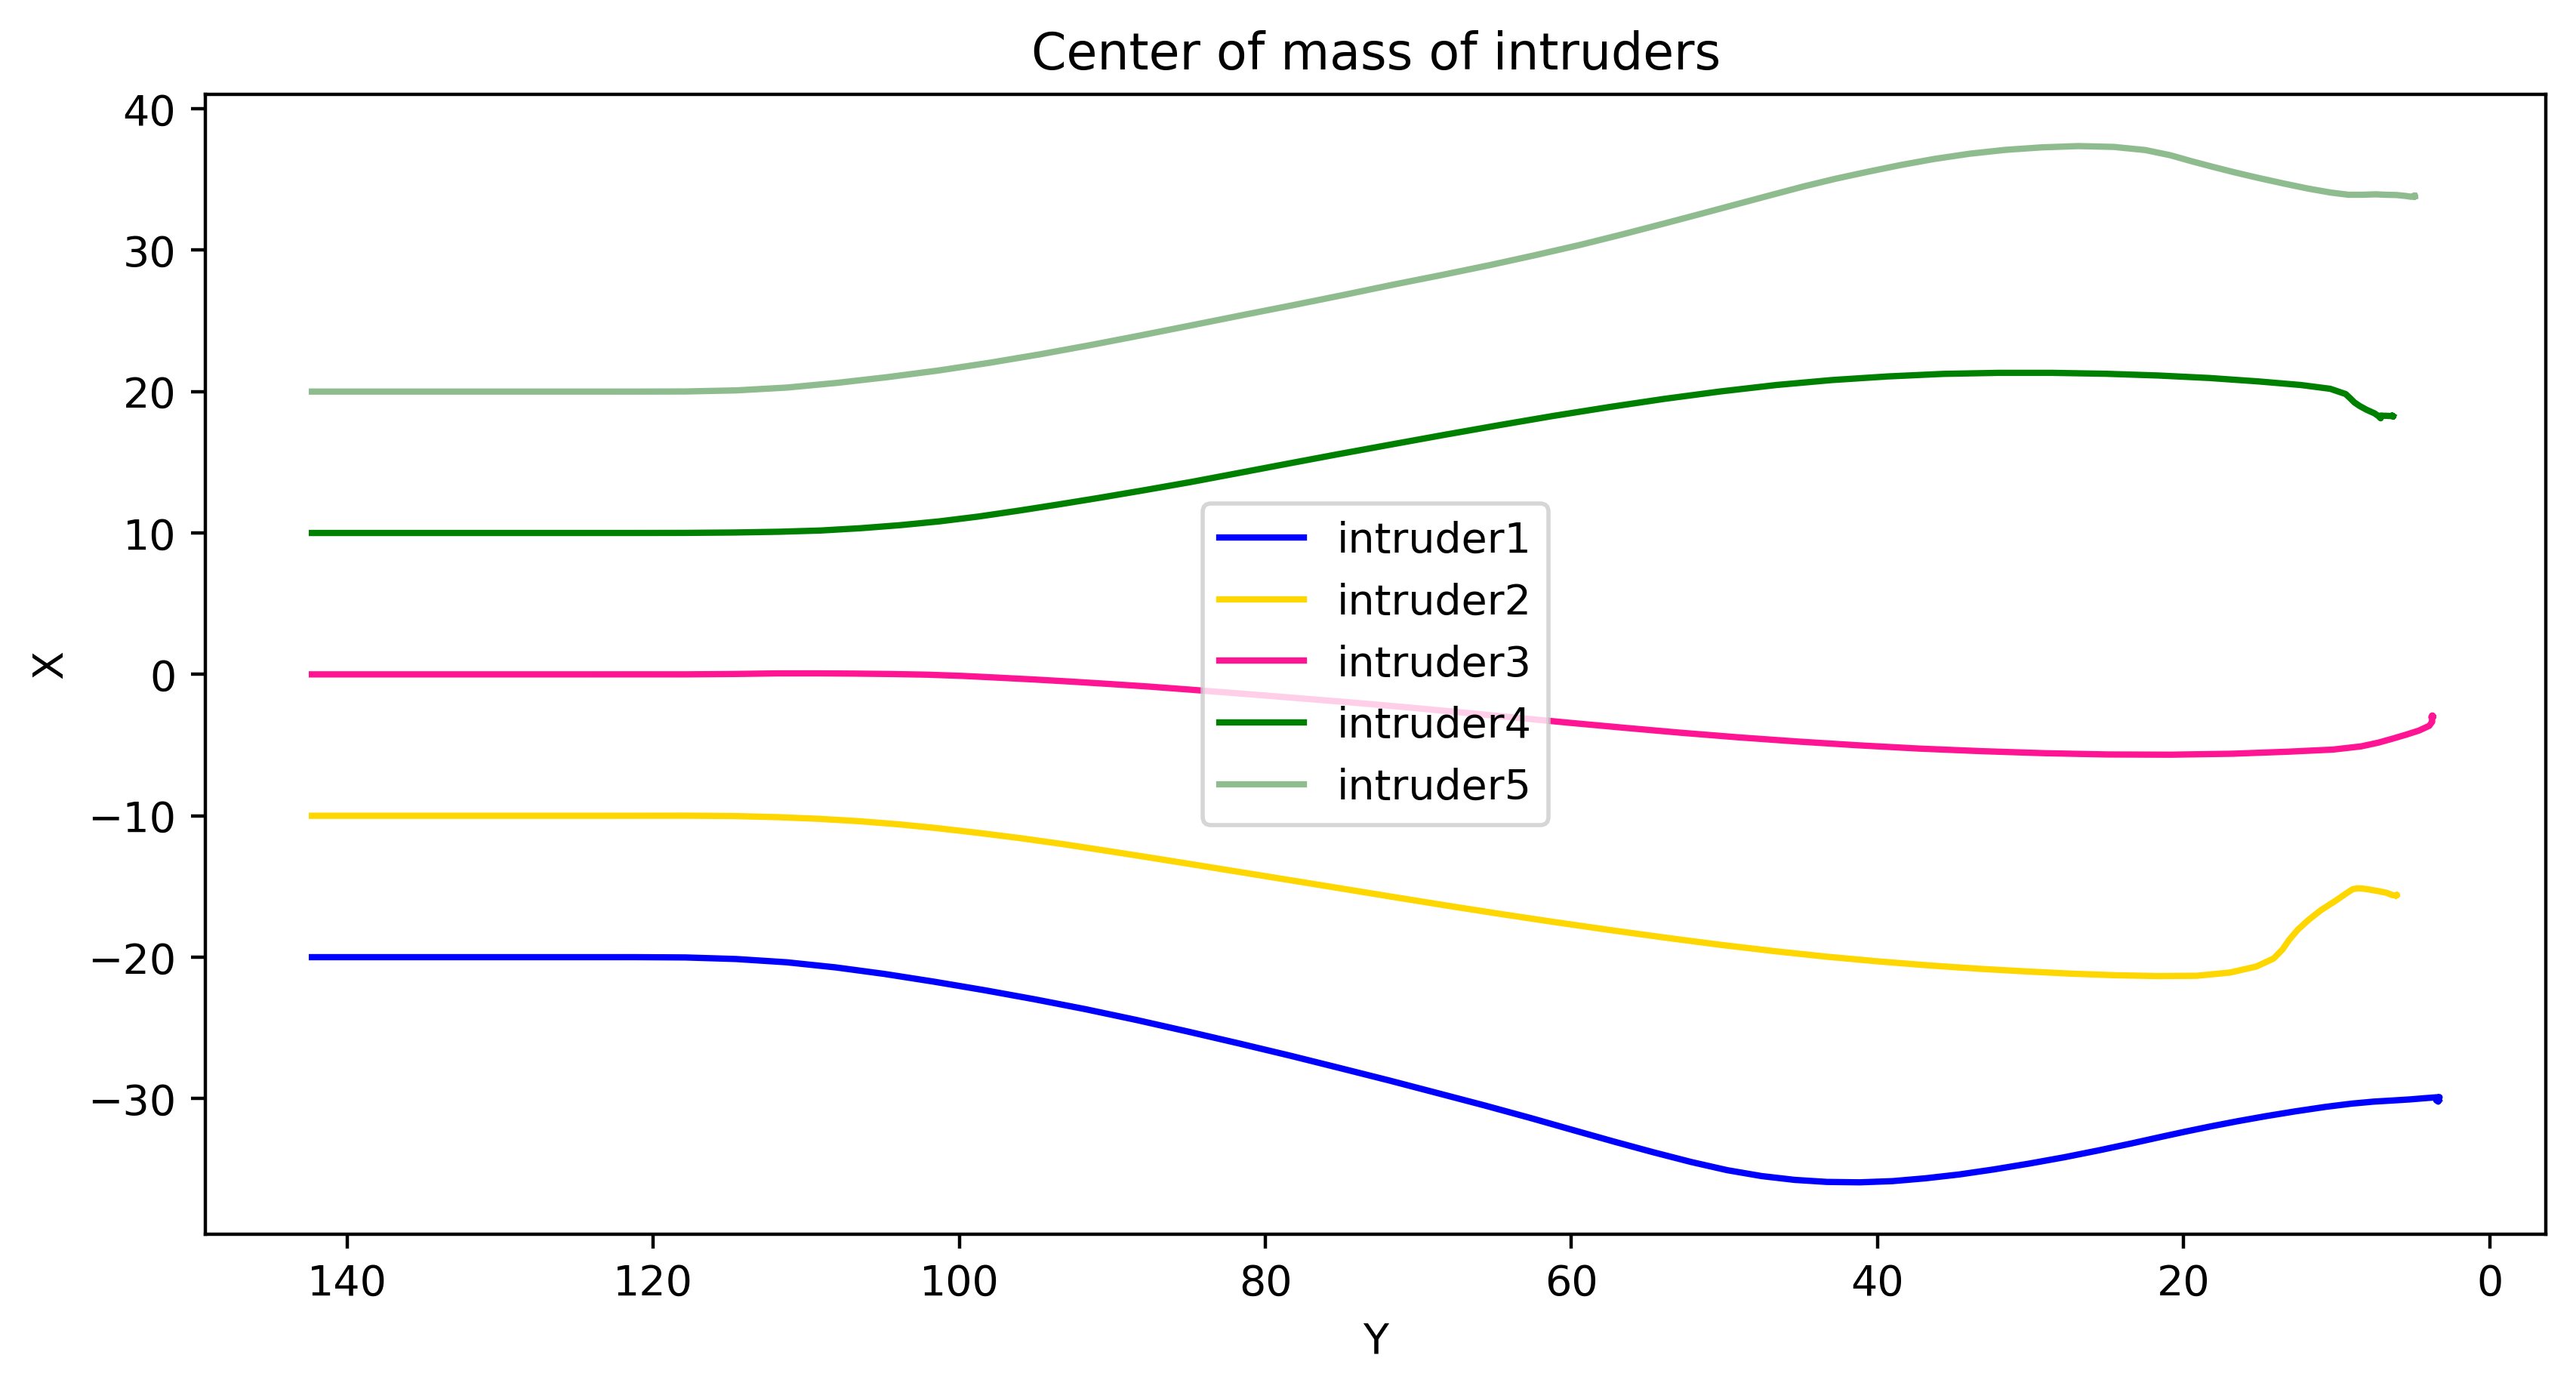

In [12]:
# x Vs y
plt.figure(figsize=(10,5),dpi=400)
plt.gca().invert_xaxis()
plt.plot(y_Arr1,x_Arr1,label='intruder1',color='blue')
plt.plot(y_Arr2,x_Arr2,label='intruder2',color='gold')
plt.plot(y_Arr3,x_Arr3,label='intruder3',color='deeppink')
plt.plot(y_Arr4,x_Arr4,label='intruder4',color='green')
plt.plot(y_Arr5,x_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.title('Center of mass of intruders')
plt.savefig('intruder x Vs y.jpg',bbox_inches='tight')
plt.show()

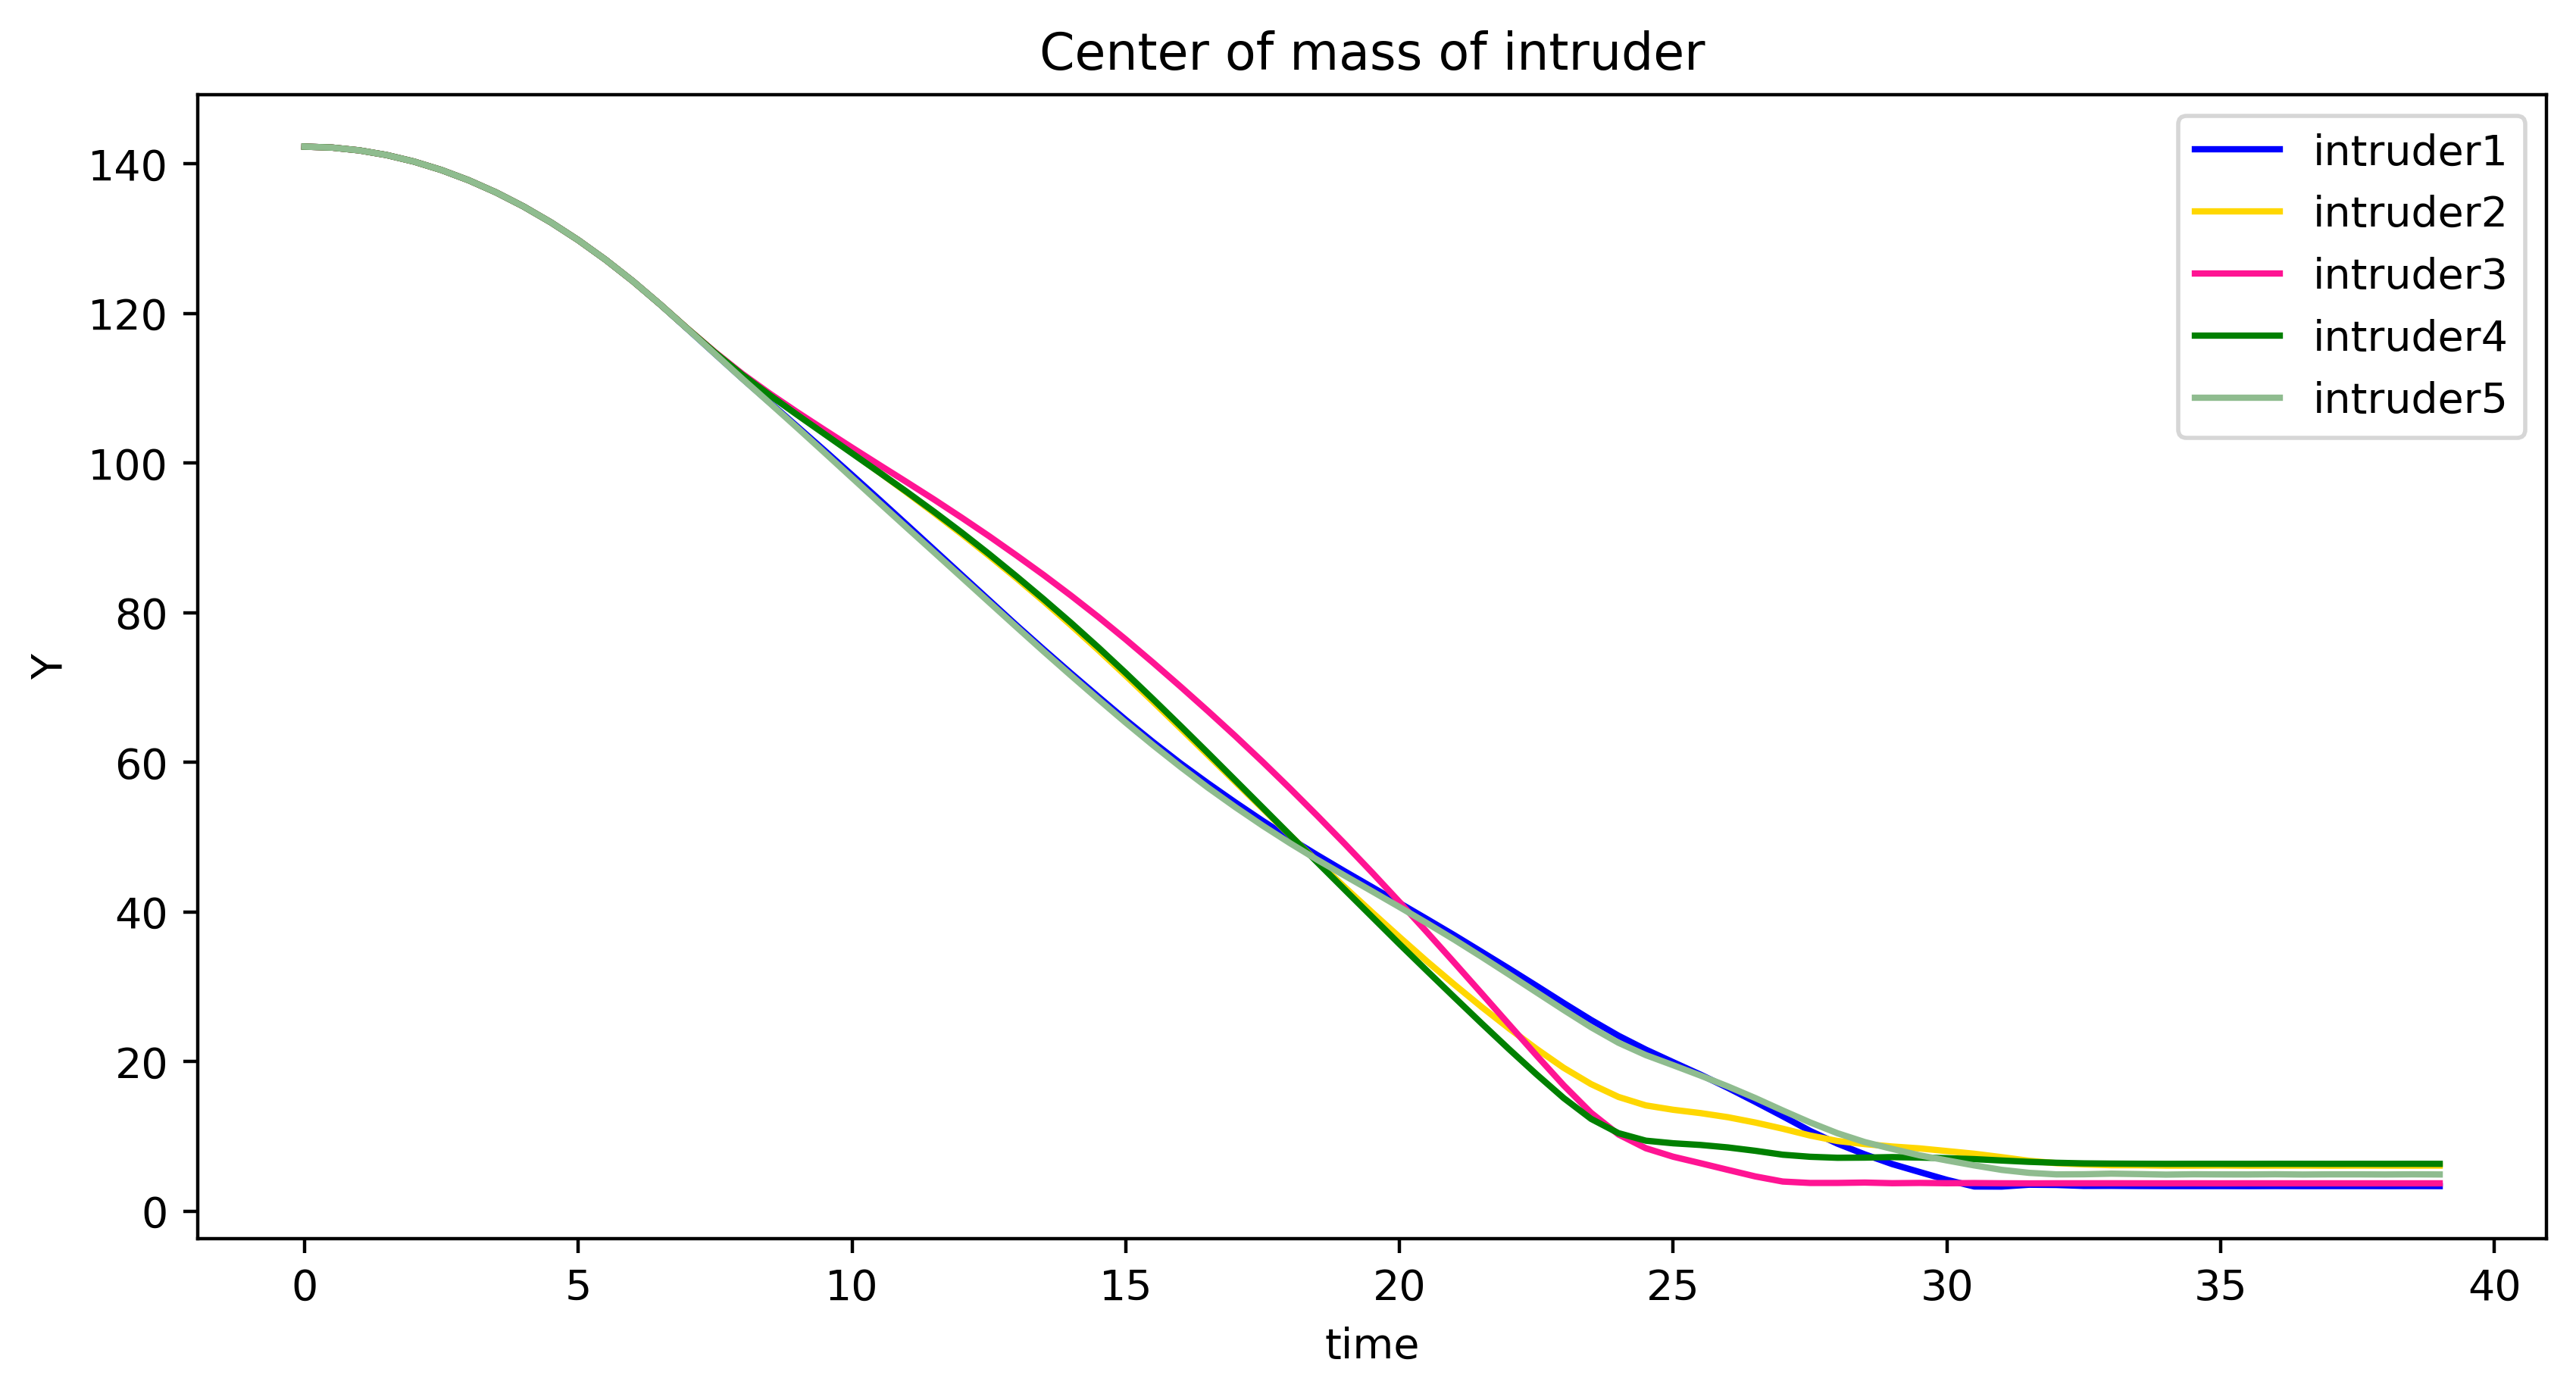

In [13]:
# y Vs time
plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,y_Arr1,label='intruder1',color='blue')
plt.plot(time_Arr,y_Arr2,label='intruder2',color='gold')
plt.plot(time_Arr,y_Arr3,label='intruder3',color='deeppink')
plt.plot(time_Arr,y_Arr4,label='intruder4',color='green')
plt.plot(time_Arr,y_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('Y')
plt.legend()
plt.title('Center of mass of intruder')
plt.savefig('intruder y Vs time.jpg',bbox_inches='tight')
plt.show()

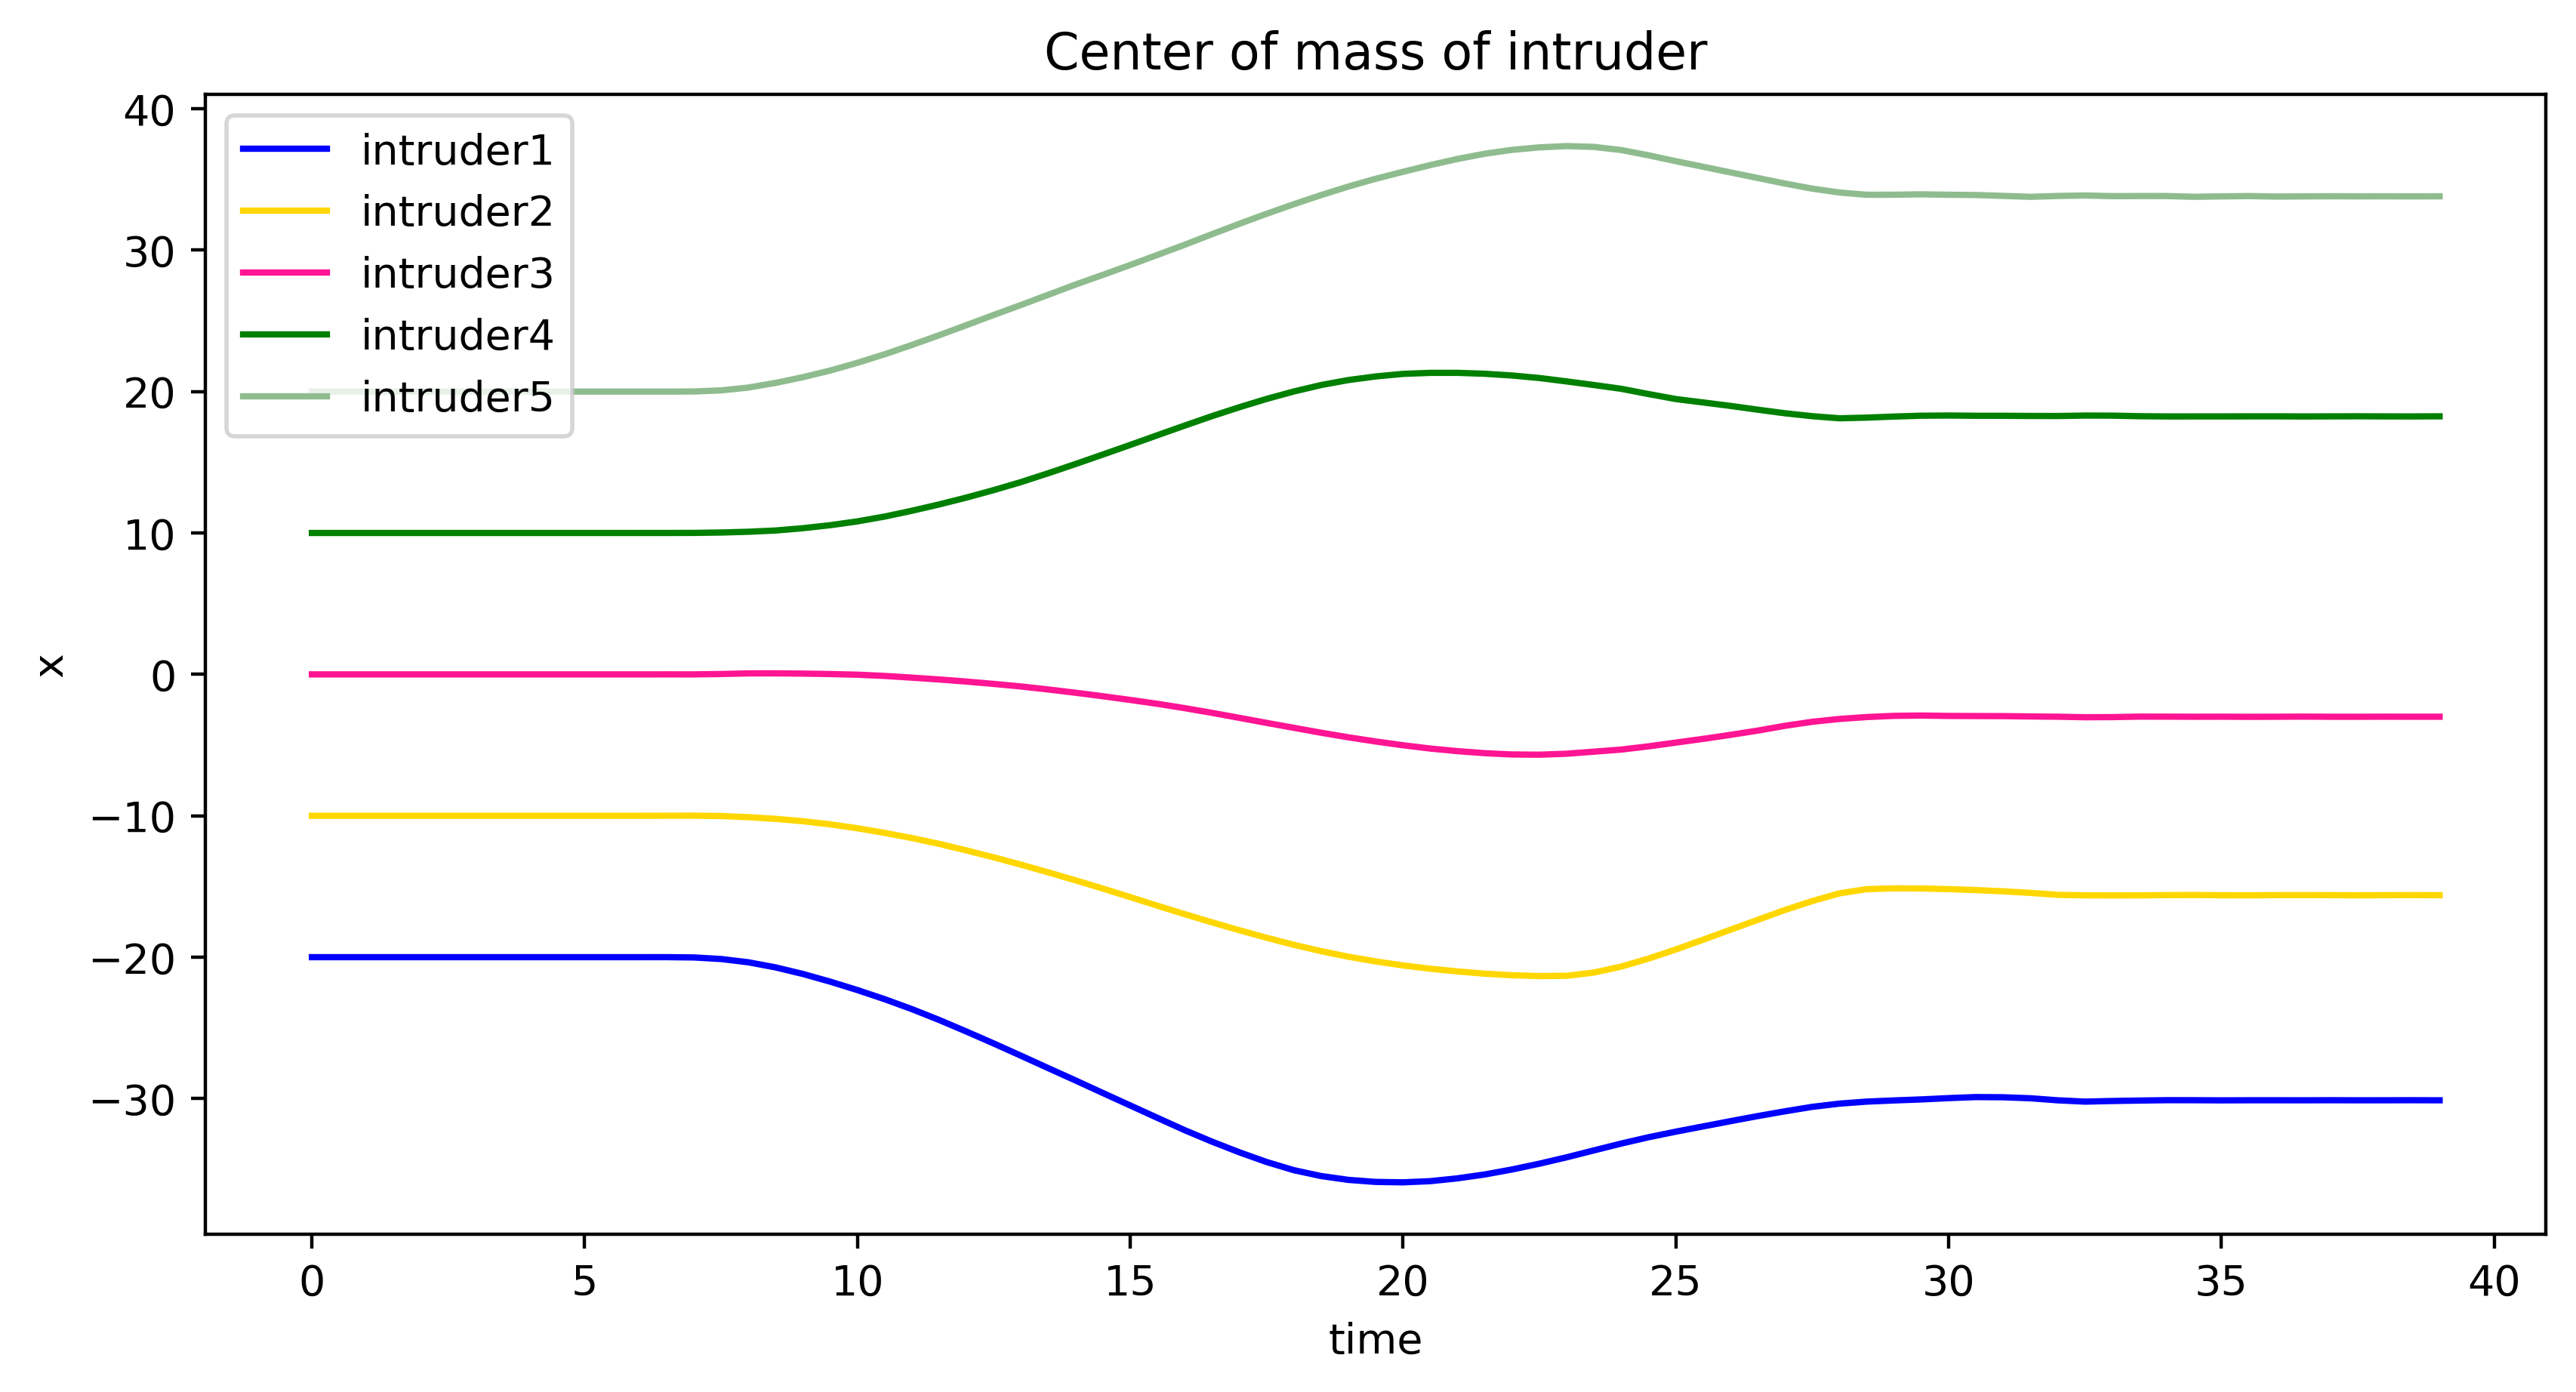

In [14]:
# x Vs time
plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,x_Arr1,label='intruder1',color='blue')
plt.plot(time_Arr,x_Arr2,label='intruder2',color='gold')
plt.plot(time_Arr,x_Arr3,label='intruder3',color='deeppink')
plt.plot(time_Arr,x_Arr4,label='intruder4',color='green')
plt.plot(time_Arr,x_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('x')
plt.legend()
plt.title('Center of mass of intruder')
plt.savefig('intruder x Vs time.jpg',bbox_inches='tight')
plt.show()

## For Orientataion

In [15]:
orientation1 = []
orientation2 = []
orientation3 = []
orientation4 = []
orientation5 = []
for i in data1.index:
    instance1  = data1.loc[i]
    instance2  = data2.loc[i]
    instance3  = data3.loc[i]
    instance4  = data4.loc[i]
    instance5  = data5.loc[i]
    dely = (instance1[42477][1]-instance1[42473][1])
    delx = (instance1[42477][0]-instance1[42473][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation1.append(theta)
    
    dely = (instance2[42492][1]-instance2[42488][1])
    delx = (instance2[42492][0]-instance2[42488][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation2.append(theta)
    
    dely = (instance3[42507][1]-instance3[42503][1])
    delx = (instance3[42507][0]-instance3[42503][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation3.append(theta)
    
    dely = (instance4[42522][1]-instance4[42518][1])
    delx = (instance4[42522][0]-instance4[42518][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation4.append(theta)
    
    dely = (instance5[42537][1]-instance5[42533][1])
    delx = (instance5[42537][0]-instance5[42533][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation5.append(theta)
    

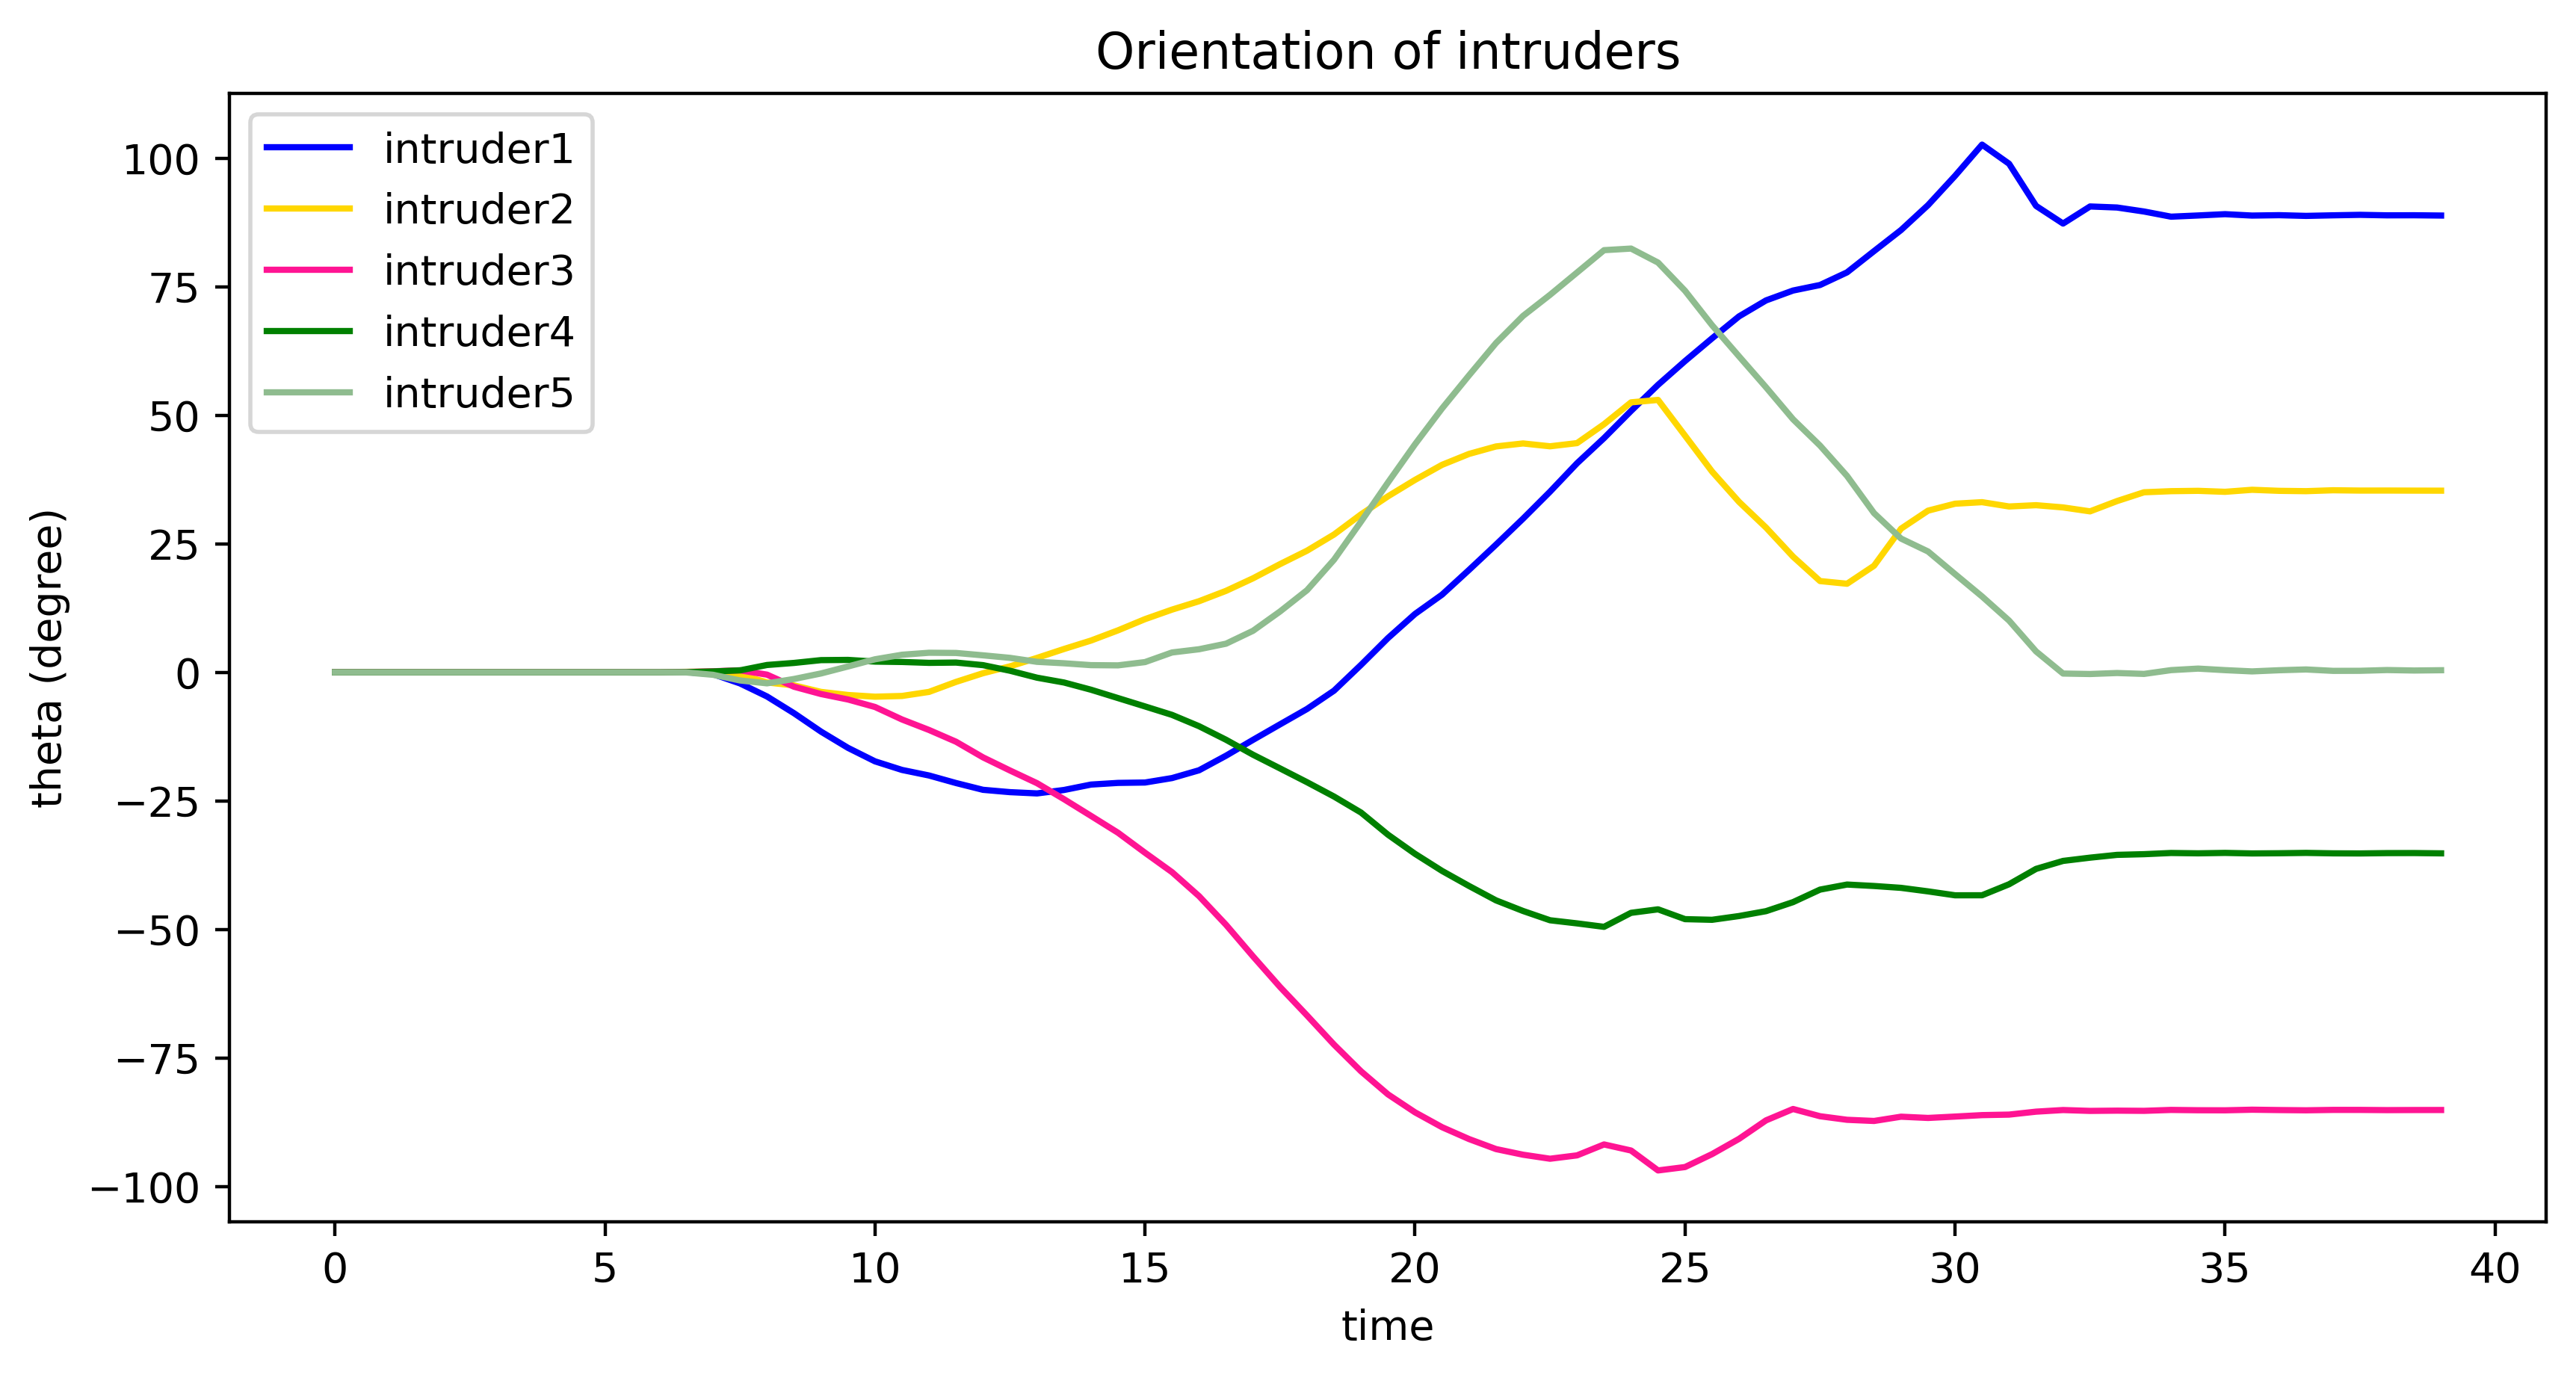

In [16]:
# theta Vs time
plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,orientation1,label='intruder1',color='blue')
plt.plot(time_Arr,orientation2,label='intruder2',color='gold')
plt.plot(time_Arr,orientation3,label='intruder3',color='deeppink')
plt.plot(time_Arr,orientation4,label='intruder4',color='green')
plt.plot(time_Arr,orientation5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('theta (degree)')
plt.title('Orientation of intruders')
plt.legend()
plt.savefig('orientation.jpg',bbox_inches='tight')
plt.show()

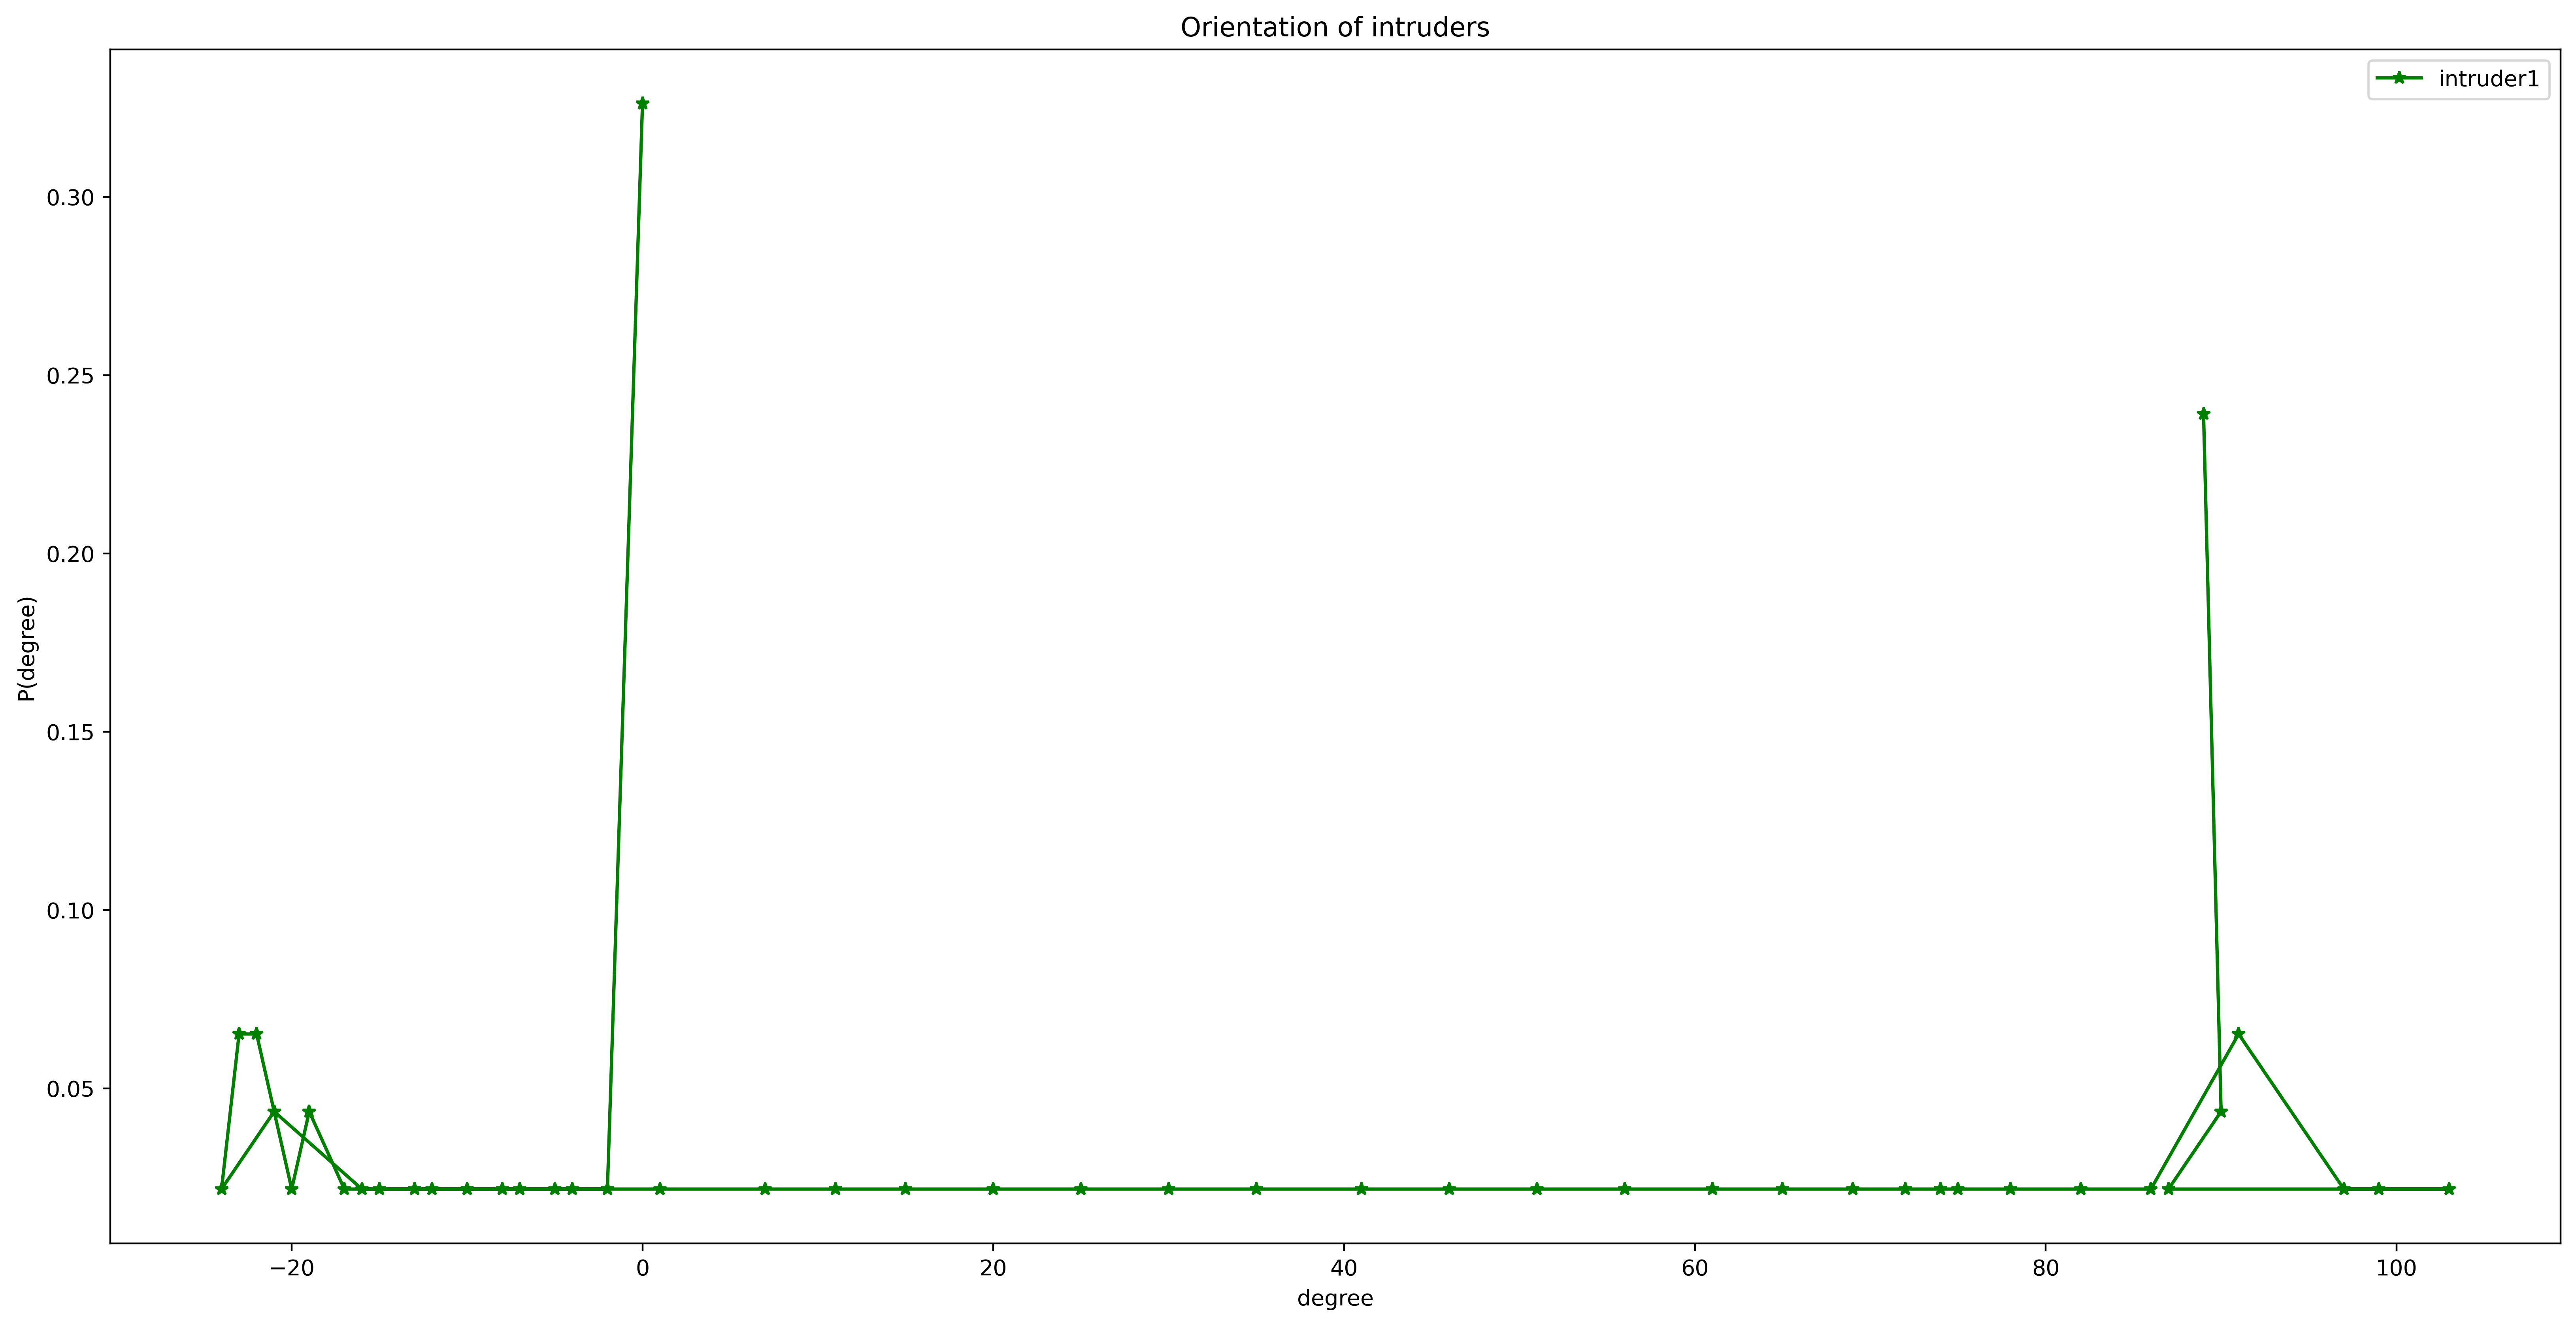

In [17]:
intruder1_degree = []
intruder1_prob_degree = []
prob_degree_map = dict()
for i in orientation1:
    degree = round(i)
    if degree not in prob_degree_map:
        prob_degree_map[degree] = 1
    else:
        prob_degree_map[degree] += 1

for degree,val in prob_degree_map.items():
    intruder1_degree.append(degree)
    intruder1_prob_degree.append(val)
total = len(intruder1_degree)
for i in range(total):
    intruder1_prob_degree[i] = np.round(intruder1_prob_degree[i]/total,5)


plt.figure(figsize=(20,10),dpi=400)
# plt.scatter(intruder1_degree,intruder1_prob_degree,label='intruder1')
plt.plot(intruder1_degree,intruder1_prob_degree,'*g-',label='intruder1')
plt.xlabel('degree')
plt.ylabel('P(degree)')
plt.title('Orientation of intruders')
plt.legend()
plt.savefig('intruder1_prob_distribution.jpg',bbox_inches='tight')
plt.show()

In [18]:
sum(intruder1_prob_degree)

1.7174400000000012

In [19]:
orientation1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04297182657759709,
 -0.3581029116631056,
 -2.1634561410650446,
 -4.703569527681642,
 -7.960957285618556,
 -11.537198500997626,
 -14.69981781696596,
 -17.31924720670085,
 -18.991192255080264,
 -20.0703615817406,
 -21.538346290213628,
 -22.856652614767857,
 -23.3110633731595,
 -23.55670798322285,
 -22.88882154919041,
 -21.83598814447839,
 -21.512015142645204,
 -21.436737439096003,
 -20.572977785016366,
 -19.058246071168327,
 -16.222619321294303,
 -13.14127600789749,
 -10.12663570053728,
 -7.134432516193341,
 -3.571866826030291,
 1.4411533281172135,
 6.664147070468477,
 11.342518493508777,
 15.095193301304935,
 19.910414040541184,
 24.83006449746161,
 29.87173796760536,
 35.123563645977875,
 40.65070040384793,
 45.54189566064656,
 50.825889624212536,
 55.89914588072224,
 60.52481581191104,
 64.93923328231396,
 69.21444496910432,
 72.32015696064427,
 74.23758542416577,
 75.31534573454219,
 77.77359640334207,
 

In [20]:
sorted(intruder1_degree)

[-24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -17,
 -16,
 -15,
 -13,
 -12,
 -10,
 -8,
 -7,
 -5,
 -4,
 -2,
 0,
 1,
 7,
 11,
 15,
 20,
 25,
 30,
 35,
 41,
 46,
 51,
 56,
 61,
 65,
 69,
 72,
 74,
 75,
 78,
 82,
 86,
 87,
 89,
 90,
 91,
 97,
 99,
 103]